# 3 排序图

## 3.2 棒棒糖图

横坐标：车辆品牌<br>
纵坐标：城市里程/加仑

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#准备数据
df_raw = pd.read_csv('https://github.com/selva86/datasets/raw/master/mpg_ggplot2.csv')

#用manufacturer分组聚合，求出城市英里/加仑的均值
df = df_raw[['cty', 'manufacturer']].groupby('manufacturer').apply(lambda s:s.mean())

df.sort_values('cty', inplace = True) #排序
df.reset_index(inplace = True) #索引恢复

<function matplotlib.pyplot.show(*args, **kw)>

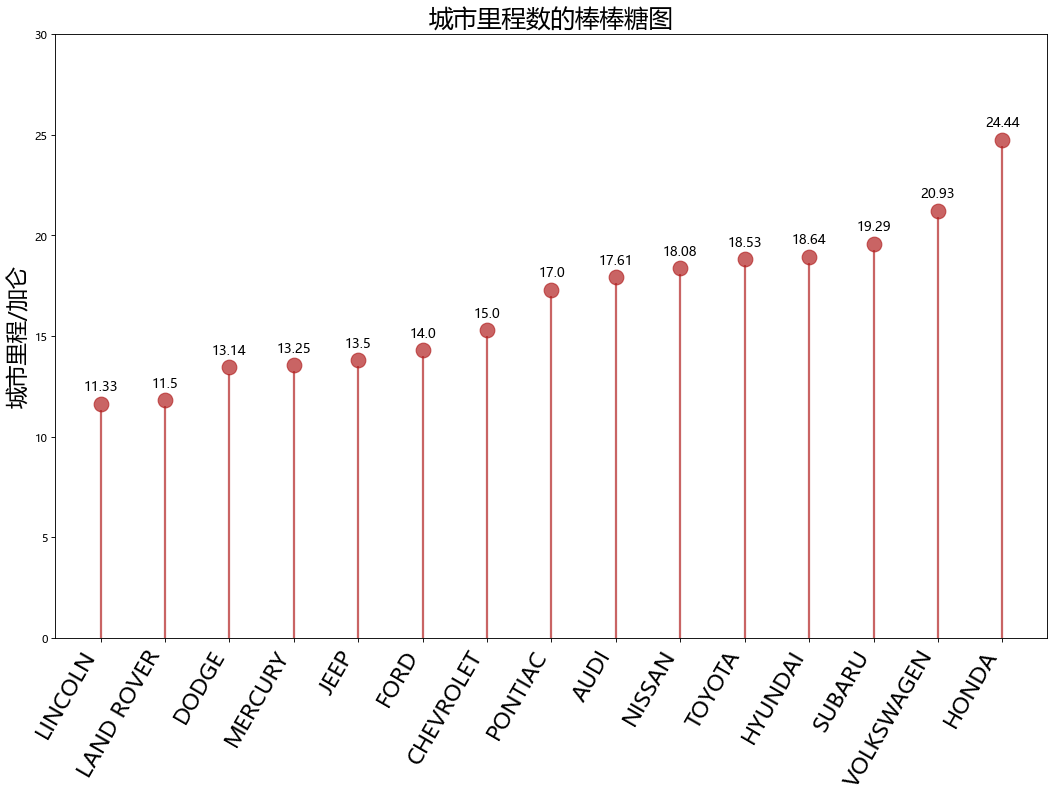

In [5]:
#建立画布和子图
fig, ax = plt.subplots(figsize = (16,10), dpi = 80)

#先画竖线作为柱子
ax.vlines(x = df.index
         ,ymin = 0
         ,ymax = df.cty
         ,color = 'firebrick'
         ,alpha = 0.7
         ,linewidth = 2
         )

#在竖线顶端画上散点作为糖
ax.scatter(x = df.index
          ,y = df.cty + 0.3 #避免线与点重合
          ,s = 175
          ,color = 'firebrick'
          ,alpha = 0.7
          )

#装饰
plt.rcParams['font.sans-serif'] = ['Microsoft Yahei']
ax.set_title('城市里程数的棒棒糖图', fontdict = {'size':22})
ax.set_ylabel('城市里程/加仑', fontsize = 20)
ax.set_xticks(df.index)
ax.set_xticklabels(df.manufacturer.str.upper()
                  ,rotation = 60
                  ,fontdict = {'horizontalalignment': 'right'
                              ,'size': 20}) #类似于plt.xticks()
ax.set_ylim(0, 30)

#为每颗棒棒糖放上注释
for row in df.itertuples():
    ax.text(row.Index
           ,row.cty + 0.8
           ,s = round(row.cty, 2)
           ,horizontalalignment = 'center'
           ,verticalalignment = 'bottom'
           ,fontsize = 12
           )
plt.show

## 3.3 包点图

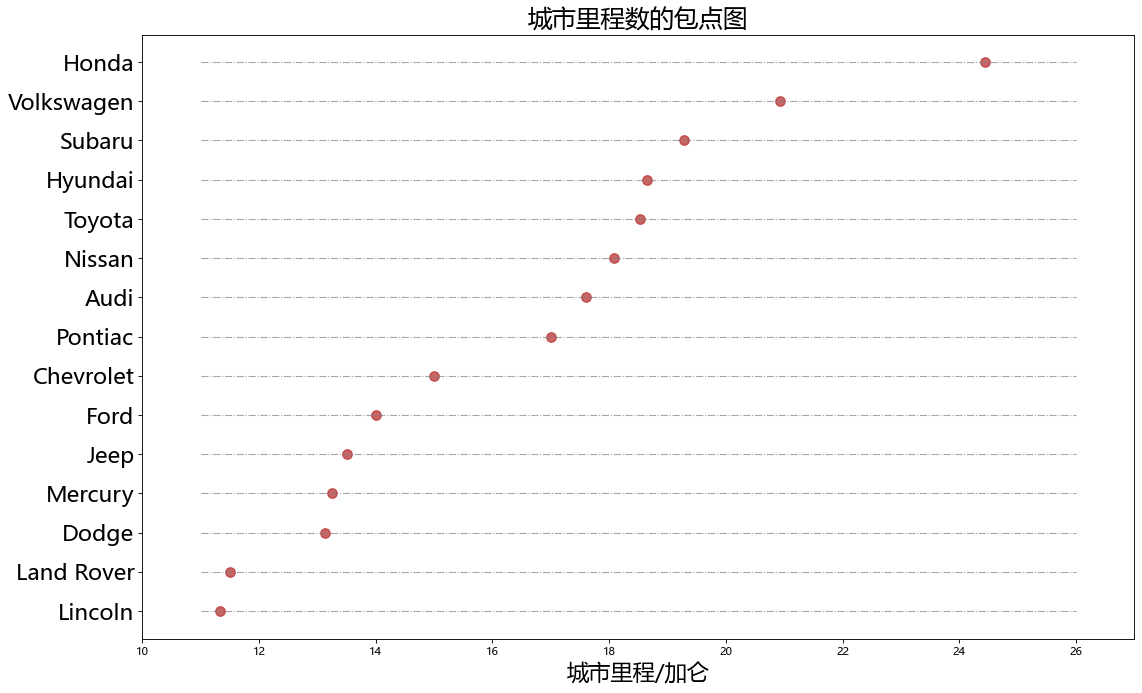

In [6]:
#建立画布和子图
fig, ax = plt.subplots(figsize = (16,10), dpi = 80)

#用绘制横线的函数hlines画出虚线
ax.hlines(y = df.index #纵坐标
         ,xmin = 11 #为了让虚线布满屏幕，从比城市里程/加仑的最小值低一些的地方开始
         ,xmax = 26 #到比城市里程/加仑的最大值高一些的地方结束
         ,color = 'gray'
         ,alpha = 0.7
         ,linewidth = 1
         ,linestyles = 'dashdot' #虚线
         )

#在虚线上绘制出散点
ax.scatter(y = df.index
          ,x = df.cty
          ,s = 75
          ,color = 'firebrick'
          ,alpha = 0.7
          )

#装饰图像
ax.set_title('城市里程数的包点图', fontdict = {'size':22})
ax.set_xlabel('城市里程/加仑', fontsize = 20)
ax.set_yticks(df.index)
ax.set_yticklabels(df.manufacturer.str.title()
                  ,fontdict = {'horizontalalignment': 'right'
                              ,'size': 20}) #类似于plt.yticks()
ax.set_xlim(10, 27)
plt.show()